In [3]:
#Get the data, read the modified csv version
import pandas as pd
import numpy as np
dataset = pd.read_csv(r'csv/modified_female_shirts.csv')
#dataset.loc[:, 'gender'] = 1
dataset.loc[dataset['gender'] == 'Male', 'gender'] = 1
dataset.loc[dataset['gender'] == 'Female', 'gender'] = 0
dataset.head(3)
dataset.tail(3)

,height(cm),weight(kg),gender,size
6065,167.64,76.203518,0,XXL
6066,160.02,60.327785,0,M
6067,167.64,59.874193,0,XL


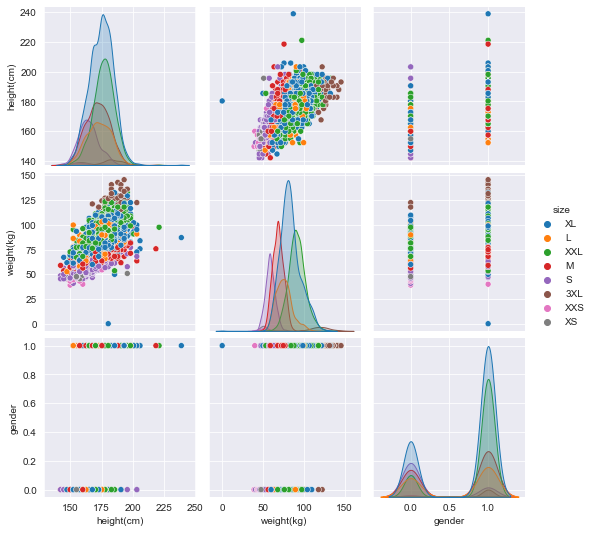

In [4]:
import seaborn as sns
%matplotlib inline

sns.pairplot(dataset, hue='size')

In [5]:
from sklearn.model_selection import train_test_split
X = dataset.drop('size', axis=1).values
y = dataset['size'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
decision_prediction = tree_classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, decision_prediction))
print(classification_report(y_test, decision_prediction))

[[ 11   0   1   0  15   0   6   0]
 [  0  71 104  12 148   0  24   0]
 [  0 110 260  57  77   1   1   1]
 [  0  46  80 136  13   9   1   4]
 [  7 125 107  11 664   0 212   2]
 [  0   0   0  14   0   0   0   3]
 [ 11  41   6   0 317   0 318   0]
 [  0   0   1   3   0   2   0   2]]
              precision    recall  f1-score   support

         3XL       0.38      0.33      0.35        33
           L       0.18      0.20      0.19       359
           M       0.47      0.51      0.49       507
           S       0.58      0.47      0.52       289
          XL       0.54      0.59      0.56      1128
          XS       0.00      0.00      0.00        17
         XXL       0.57      0.46      0.51       693
         XXS       0.17      0.25      0.20         8

    accuracy                           0.48      3034
   macro avg       0.36      0.35      0.35      3034
weighted avg       0.49      0.48      0.48      3034



In [8]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=200)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [9]:
random_forest_predictions = random_forest_classifier.predict(X_test)
print(confusion_matrix(y_test, random_forest_predictions))
print(classification_report(y_test, random_forest_predictions))

[[ 10   0   1   0  16   0   6   0]
 [  0  47  95  15 168   2  32   0]
 [  0  78 262  74  85   1   6   1]
 [  0  26  75 154  17  11   0   6]
 [  4  92  97  15 683   0 236   1]
 [  0   0   0  14   0   0   0   3]
 [  5  18   6   0 313   0 351   0]
 [  0   0   1   5   0   0   0   2]]
              precision    recall  f1-score   support

         3XL       0.53      0.30      0.38        33
           L       0.18      0.13      0.15       359
           M       0.49      0.52      0.50       507
           S       0.56      0.53      0.54       289
          XL       0.53      0.61      0.57      1128
          XS       0.00      0.00      0.00        17
         XXL       0.56      0.51      0.53       693
         XXS       0.15      0.25      0.19         8

    accuracy                           0.50      3034
   macro avg       0.37      0.36      0.36      3034
weighted avg       0.49      0.50      0.49      3034



In [15]:
person = [[152, 45, 0]]
tree_classifier.predict(person)

array(['XS'], dtype=object)

In [17]:
person = [[167, 66, 0]]
tree_classifier.predict(person)

array(['XL'], dtype=object)